# Anomaly Detection Assignments

## 1. Isolation Forests

In [1]:
# 1a. Open the tripadvisor_reviews.csv file
import pandas as pd
df = pd.read_csv('../Data/tripadvisor_reviews.csv')
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.93,2.8,3.29,1.62
1,User 2,2.02,3.2,3.66,1.64
2,User 3,2.22,1.8,1.54,1.53
3,User 4,1.45,2.8,1.29,1.57
4,User 5,1.51,2.2,2.18,1.57


In [3]:
# 1b. Remove the user_id column (non-numeric columns)
X = df.iloc[:, 1:]
print(X.shape)
X.head()

(980, 4)


,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,1.93,2.8,3.29,1.62
1,2.02,3.2,3.66,1.64
2,2.22,1.8,1.54,1.53
3,1.45,2.8,1.29,1.57
4,1.51,2.2,2.18,1.57


In [5]:
# 1c. View the min and max of each rating
X.describe()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
count,980.000000,980.000000,980.000000,980.000000
mean,1.893194,2.352612,2.013306,1.532500
std,0.326912,0.478280,0.788607,0.279731
min,1.340000,1.000000,1.130000,1.150000
25%,1.670000,2.080000,1.270000,1.410000
50%,1.830000,2.280000,1.820000,1.500000
75%,2.020000,2.560000,2.572500,1.580000
max,4.220000,4.640000,4.620000,4.440000


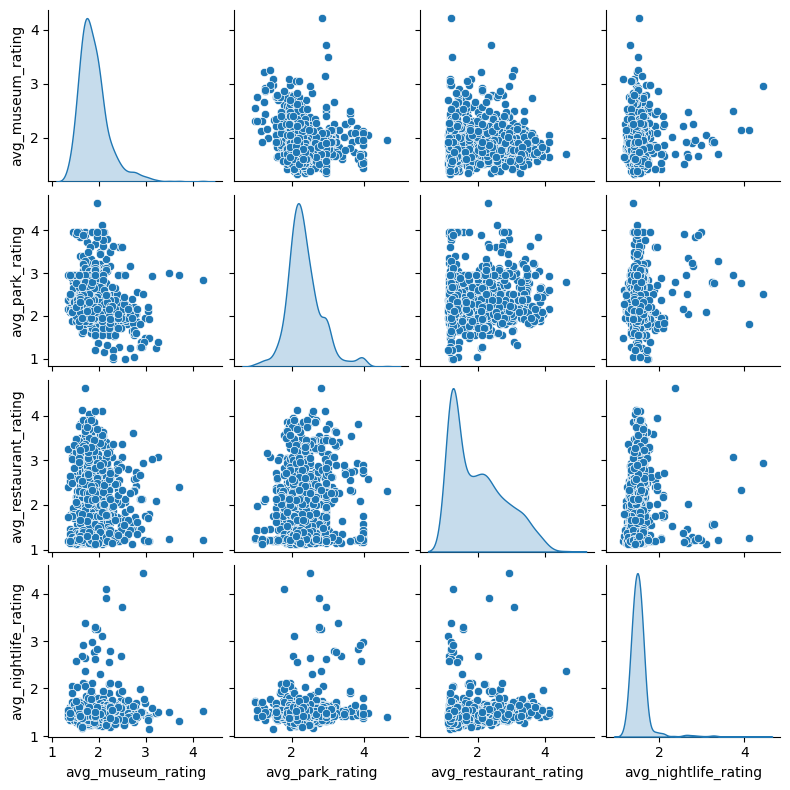

In [8]:
# 2. Visualize the data using a seaborn pair plot
import seaborn as sns
sns.pairplot(data=X, diag_kind='kde', height=2);

In [9]:
# 3. Fit an Isolation Forest model using a contamination of 1%
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [12]:
# 3b. 
df['anomaly_scores'] = model.decision_function(X)
df['anomaly'] = model.predict(X) # this just sets the anomaly field to -1 or 1
df.sort_values('anomaly_scores').head(12)

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomaly
666,User 667,2.95,2.52,2.94,4.44,-0.067768,-1
247,User 248,2.50,2.96,3.08,3.73,-0.042649,-1
322,User 323,4.22,2.84,1.22,1.53,-0.031542,-1
728,User 729,1.86,3.96,1.21,2.98,-0.031120,-1
422,User 423,1.51,3.92,1.16,2.58,-0.024842,-1
677,User 678,3.26,1.40,3.08,1.50,-0.020486,-1
501,User 502,3.72,2.96,2.39,1.32,-0.018382,-1
601,User 602,2.15,1.80,1.26,4.10,-0.009647,-1
903,User 904,1.67,3.88,1.26,2.91,-0.004112,-1
592,User 593,1.70,3.28,1.22,3.38,-0.002209,-1


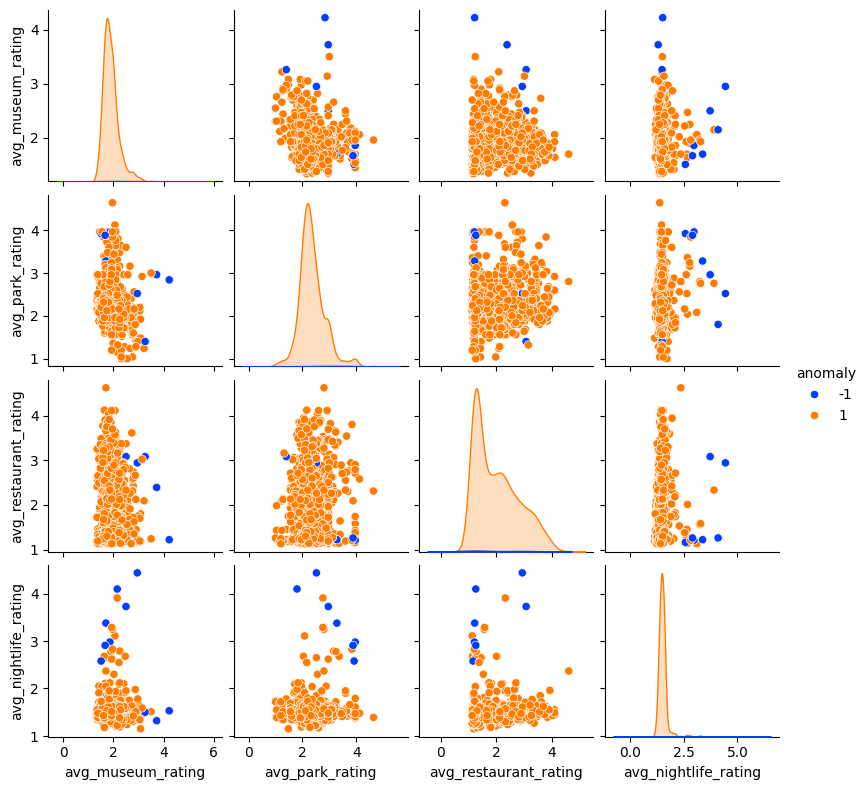

In [15]:
# 4. Visualize the anomalies on the seaborn pair plot
sns.pairplot(
    # the 'anomaly_scores' column is not needed, the user_id column will be ignored
    data = df.drop(columns='anomaly_scores'), 
    hue = 'anomaly',     # each value gets a different color (-1, 1)
    palette = 'bright',  # color palette
    height = 2);

In [16]:
# 5. Where do you notice anomalies in the pair plot?
# super-high ratings

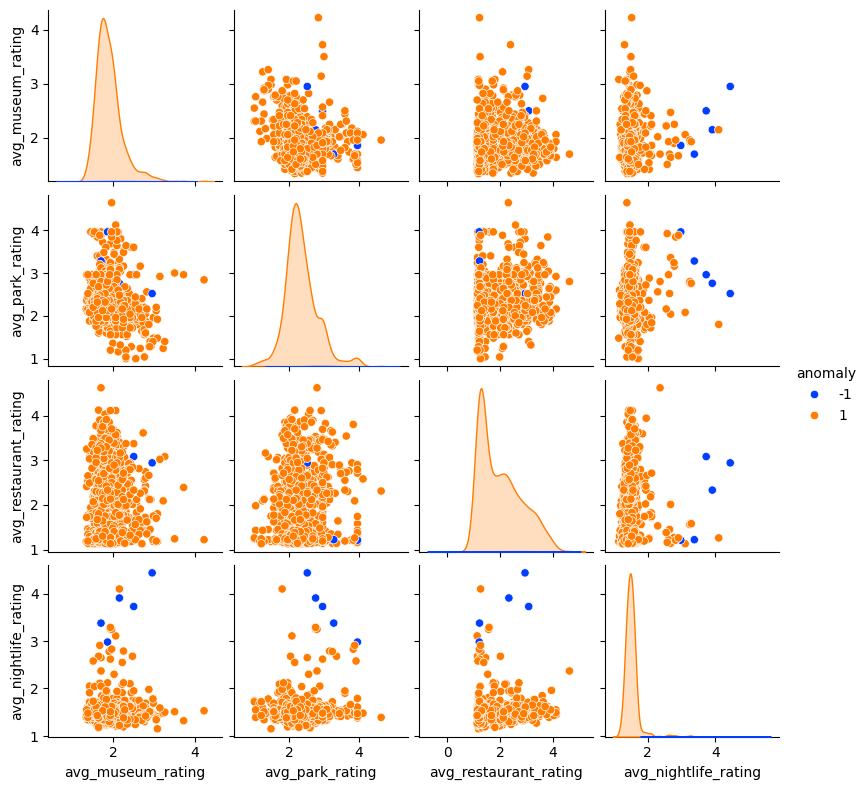

In [17]:
# 6. Modify the contamination to 0.5% to capture fewer anomalies and visualize the differences
model5 = IsolationForest(contamination=0.005)
model5.fit(X)
df['anomaly_scores'] = model5.decision_function(X)
df['anomaly'] = model5.predict(X) # this just sets the anomaly field to -1 or 1
sns.pairplot(
    # the 'anomaly_scores' column is not needed, the user_id column will be ignored
    data = df.drop(columns='anomaly_scores'), 
    hue = 'anomaly',     # each value gets a different color (-1, 1)
    palette = 'bright',  # color palette
    height = 2);

## 2. DBSCAN

In [18]:
# 1. Paste the DBSCAN function from the anomaly detection demo notebook that loops through multiple eps and min_samples values to fit multiple DBSCAN models

# dbscan function (copied from clustering section) to find a good eps + min_samples combo
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, 
        columns=["Eps", "Min Samples", "Number of Clusters", "Number of Noise Points", "Silhouette Score"])
    return dbscan_results 

In [20]:
# 2. Apply the function on the tourist rating data set
X.head()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,1.93,2.8,3.29,1.62
1,2.02,3.2,3.66,1.64
2,2.22,1.8,1.54,1.53
3,1.45,2.8,1.29,1.57
4,1.51,2.2,2.18,1.57


In [22]:
dbscan_results = tune_dbscan(X)
dbscan_results

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,109,584,-0.310168
1,0.1,3,31,740,-0.458483
2,0.1,4,16,797,-0.445806
3,0.1,5,10,850,-0.382044
4,0.1,6,5,899,-0.178858
...,...,...,...,...,...
147,1.9,5,1,0,NaN
148,1.9,6,1,0,NaN
149,1.9,7,1,0,NaN
150,1.9,8,1,0,NaN


In [23]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
dbscan_results.sort_values(by='Silhouette Score', ascending=False).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
56,0.8,2,2,7,0.441910
53,0.7,7,2,16,0.405540
42,0.6,4,2,17,0.397147
41,0.6,3,2,14,0.391766
40,0.6,2,2,14,0.391766


In [24]:
# 4. Fit a single DBSCAN model using those eps and min_sample values
dbscan = DBSCAN(eps=.8, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=2)

In [25]:
# 5. Note the anomalies (-1) and visualize them on a pair plot
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomaly
0,User 1,1.93,2.8,3.29,1.62,0.220991,1
1,User 2,2.02,3.2,3.66,1.64,0.151886,1
2,User 3,2.22,1.8,1.54,1.53,0.239964,1
3,User 4,1.45,2.8,1.29,1.57,0.212097,1
4,User 5,1.51,2.2,2.18,1.57,0.259329,1


In [26]:
df['anomaly_dbscan'] = dbscan.labels_
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomaly,anomaly_dbscan
0,User 1,1.93,2.8,3.29,1.62,0.220991,1,0
1,User 2,2.02,3.2,3.66,1.64,0.151886,1,0
2,User 3,2.22,1.8,1.54,1.53,0.239964,1,0
3,User 4,1.45,2.8,1.29,1.57,0.212097,1,0
4,User 5,1.51,2.2,2.18,1.57,0.259329,1,0


In [28]:
mask = (df.anomaly == -1) | (df.anomaly_dbscan == -1)
df[mask]

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomaly,anomaly_dbscan
247,User 248,2.50,2.96,3.08,3.73,-0.029377,-1,-1
274,User 275,2.15,2.76,2.33,3.91,-0.004496,-1,-1
501,User 502,3.72,2.96,2.39,1.32,0.062474,1,-1
592,User 593,1.70,3.28,1.22,3.38,-0.002978,-1,0
601,User 602,2.15,1.80,1.26,4.10,0.004872,1,-1
666,User 667,2.95,2.52,2.94,4.44,-0.055803,-1,-1
728,User 729,1.86,3.96,1.21,2.98,-0.002180,-1,0
795,User 796,3.14,2.92,3.02,1.59,0.084606,1,-1
915,User 916,1.70,2.80,4.62,2.37,0.017104,1,-1


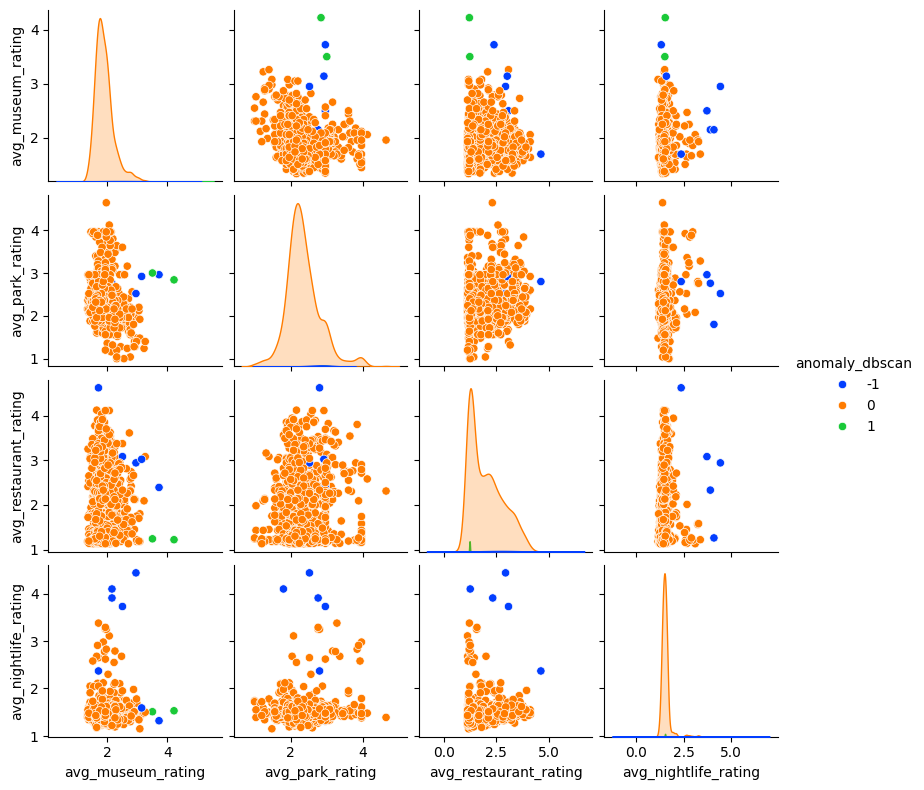

In [30]:
sns.pairplot(
    # the 'anomaly_scores' column is not needed, the user_id column will be ignored
    data = df.drop(columns=['anomaly_scores', 'anomaly']), 
    hue = 'anomaly_dbscan',  # each value gets a different color (-1, 1)
    palette = 'bright',      # color palette
    height = 2);

In [31]:
df.anomaly_dbscan.value_counts()

anomaly_dbscan
 0    971
-1      7
 1      2
Name: count, dtype: int64